In [2]:
import numpy as np
data = np.load('2D_1000.npz')
print(data.files)

['Efavg_30000']


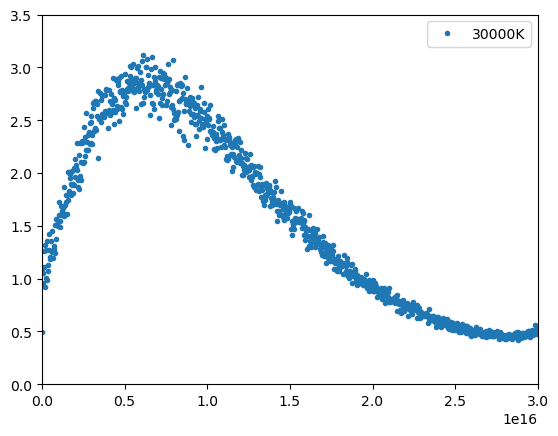

In [3]:
import matplotlib.pyplot as plt
Es = data['Efavg_30000']
freqs = np.linspace(0,30e15,1000)
plt.plot(freqs,Es,'.',label='30000K')
plt.xlim(0,3e16)
plt.ylim(0,3.5)
plt.legend()


#plt.xlabel('time')
#plt.ylabel('Electric field source Es')
plt.savefig('2D_500.png')

In [16]:
#setup some constants and parameters
M=2**21 #模擬步數
tsim=7e-12 #模擬長度
eps0 = 8.854187e-12 
hbar = 1.05457182e-34
c = 2.99792458e8
kb = 1.380649e-23
hdk=7.63823258e-12 # hbar/kb
h = 6.62607015e-34
T=1000
deltap = np.sqrt(1/3/eps0/hbar/c)*kb*T #小delta 

In [17]:
def D(omega,T):
    return(2*h*(omega/2/np.pi)**3/c**2/(np.exp(hdk*omega/T)-1))

/tmp/ipykernel_232386/507855160.py:2: RuntimeWarning: invalid value encountered in divide
  return(2*h*(omega/2/np.pi)**3/c**2/(np.exp(hdk*omega/T)-1))


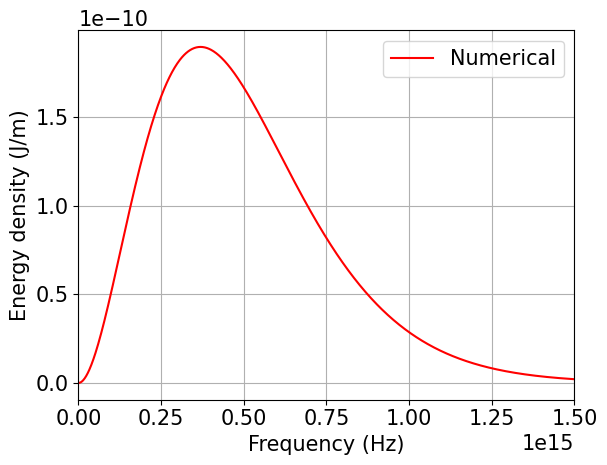

In [25]:
limit=1000
frequency_limit = np.linspace(0, 25, limit)
frequency = frequency_limit*10**13
omega = frequency*np.pi*2
plt.rcParams.update({'font.size': 15})
plt.xlim(0,15e14)
#plt.ylim(0,3.5*1e-28)
#plt.plot(freqs,Es*1e-28,'.',label='simulation')
plt.plot(omega,D(omega,1000),'red',label='Numerical')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Energy density (J/m)')
plt.grid()
plt.savefig('116.png')

In [11]:
from PIL import Image

def transPNG(srcImageName, dstImageName):
    img = Image.open(srcImageName)
    img = img.convert("RGBA")
    datas = img.getdata()
    newData = list()
    for item in datas:
        if item[0] > 225 and item[1] > 225 and item[2] > 225:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
    img.putdata(newData)
    img.save(dstImageName, "PNG")
transPNG('1.png','new1.png')

/tmp/ipykernel_232386/3698118284.py:19: RuntimeWarning: invalid value encountered in divide
  return numerator / denominator


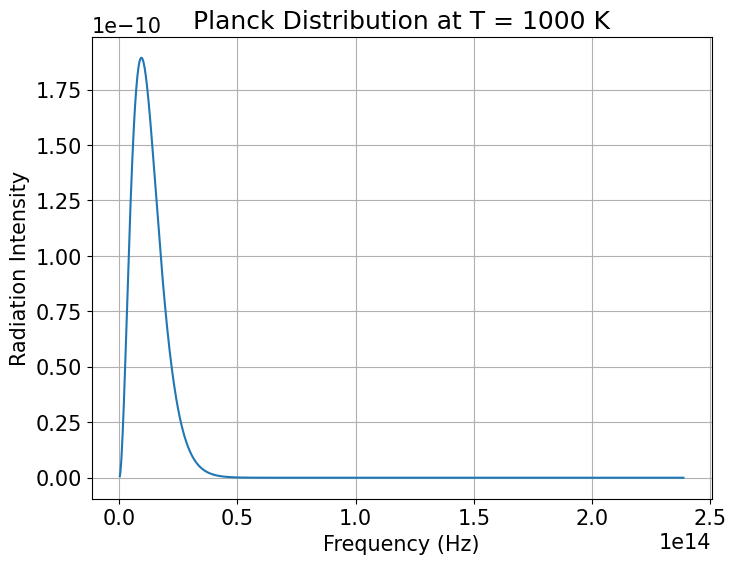

0.0

In [28]:
# Set new temperature to 1000K
import numpy as np
import matplotlib.pyplot as plt

# Constants
h = 6.62607015e-34  # Planck's constant (J·s)
c = 3.0e8  # Speed of light (m/s)
k = 1.380649e-23  # Boltzmann's constant (J/K)

T_new = 1000  # Temperature in Kelvin

# Define frequency range (in Hz)
frequencies_new = np.linspace(0, 1.5e15, 1000)

# Function to compute Planck's law for a range of frequencies and temperature
def planck_radiation_frequency(frequency, T):
    numerator = 2 * h * frequency**3 / c**2
    denominator = np.exp(h * frequency / (k * T)) - 1
    return numerator / denominator

# Compute the radiation intensity for the given range of frequencies
y_values_frequency = planck_radiation_frequency(frequencies_new, T_new)

# Plot the blackbody radiation curve for frequency
plt.figure(figsize=(8, 6))
plt.plot(frequencies_new/2/np.pi, y_values_frequency)
plt.title(f'Planck Distribution at T = {T_new} K')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Radiation Intensity')
plt.grid(True)
plt.show()

# Find the peak frequency
peak_frequency_new = frequencies_new[np.argmax(y_values_frequency)]
peak_frequency_new